In [183]:
#1. Building a tensorflow churn model
#2. Training and predicting
#3. Saving your model and reloading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import load_model # type: ignore



In [4]:
df = pd.read_csv('Churn.csv')
#initial inspection
df.head(5)


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [5]:
print(df.isnull().sum())

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [6]:
print(df.dtypes)

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object


In [7]:

# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

No duplicates found.


In [8]:
df = df.drop(columns=['Customer ID'])


In [190]:
numeric_cols = ['tenure', 'Monthly Charges', 'Total Charges']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())
    print(f"{col} dtype: {df[col].dtype}")
    print(f"{col} missing values: {df[col].isnull().sum()}")

tenure dtype: int64
tenure missing values: 0
Monthly Charges dtype: float64
Monthly Charges missing values: 0
Total Charges dtype: float64
Total Charges missing values: 0


In [191]:
#encode binary columns
binary_cols = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
#one-hot encode for categorical  columns
categorical_cols = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security',
                    'Online Backup', 'Device Protection', 'Tech Support', 
                    'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

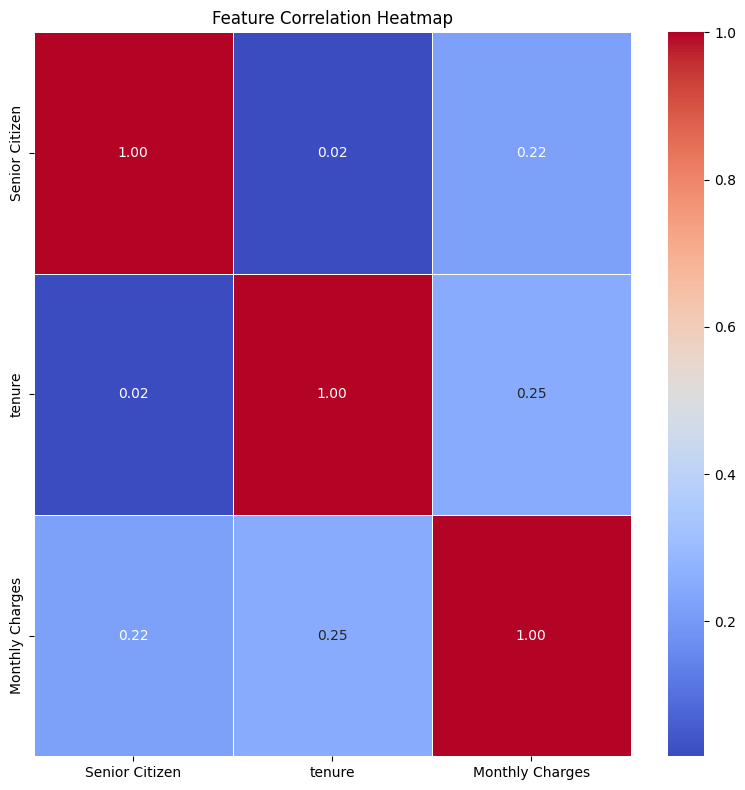

In [16]:
corr_matrix = df.corr(numeric_only=True)

# Step 4: Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [193]:
#separate features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

In [194]:
scaler = StandardScaler()
numeric_cols = ['tenure', 'Monthly Charges', 'Total Charges']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [195]:
#train/test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [196]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

d:\assignment\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
print(X_test.dtypes)
print(y_test.dtype)


Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
tenure                                    float64
Phone Service                               int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Gender_Male                                  bool
Multiple Lines_No phone service              bool
Multiple Lines_Yes                           bool
Internet Service_Fiber optic                 bool
Internet Service_No                          bool
Online Security_No internet service          bool
Online Security_Yes                          bool
Online Backup_No internet service            bool
Online Backup_Yes                            bool
Device Protection_No internet service        bool
Device Protection_Yes                        bool
Tech Support_No internet service             bool


In [198]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7531 - loss: 0.5177 - val_accuracy: 0.7853 - val_loss: 0.4465
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8073 - loss: 0.4116 - val_accuracy: 0.7933 - val_loss: 0.4406
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7949 - loss: 0.4172 - val_accuracy: 0.7959 - val_loss: 0.4391
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4126 - val_accuracy: 0.7933 - val_loss: 0.4403
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8055 - loss: 0.4125 - val_accuracy: 0.7862 - val_loss: 0.4450
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8057 - loss: 0.4074 - val_accuracy: 0.7906 - val_loss: 0.4412
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8127 - loss: 0.3951 - val_accuracy: 0.7950 - val_loss: 0.4365
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8103 - loss: 0.4024 - val_accuracy: 0.

In [199]:
model.save('churn_model.h5')

loaded_model = load_model('churn_model.h5')
loaded_model.evaluate(X_test, y_test)  

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4149


[0.4220345914363861, 0.7835344076156616]